# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [39]:
# my usual imports and setups
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV
import pylab as pl
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [40]:
import os
import json
s = json.load( open(os.getenv ('HOME')+"/PUI2017/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

In [41]:
np.random.seed(99)

# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [13]:
datestring = '201501'
getCitiBikeCSV(datestring)

('Downloading', '201501')
file in place, you can continue


In [52]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1  tripduration      starttime  \
0           0             0             0          1346  1/1/2015 0:01   
1           1             1             1           363  1/1/2015 0:02   
2           2             2             2           346  1/1/2015 0:04   
3           3             3             3           182  1/1/2015 0:04   
4           4             4             4           969  1/1/2015 0:05   

        stoptime  start station id       start station name  \
0  1/1/2015 0:24               455          1 Ave & E 44 St   
1  1/1/2015 0:08               434          9 Ave & W 18 St   
2  1/1/2015 0:10               491     E 24 St & Park Ave S   
3  1/1/2015 0:07               384  Fulton St & Waverly Ave   
4  1/1/2015 0:21               474          5 Ave & E 29 St   

   start station latitude  start station longitude  end station id  \
0               40.750020               -73.969053             265   
1               40.743174               -74.003664             482   
2               40.740964               -73.986022             505   
3               40.683178               -73.965964             399   
4               40.745168               -73.986831             432   

              end station name  end station latitude  end station longitude  \
0     Stanton St & Chrystie St             40.722293             -73.991475   
1              W 15 St & 7 Ave             40.739355             -73.999318   
2              6 Ave & W 33 St             40.749013             -73.988484   
3  Lafayette Ave & St James Pl             40.688515             -73.964763   
4            E 7 St & Avenue A             40.726218             -73.983799   

   bikeid    usertype  birth year  gender                 date  
0   18660  Subscriber      1960.0       2  2015-01-01 00:01:00  
1   16085  Subscriber      1963.0       1  2015-01-01 00:02:00  
2   20845  Subscriber      1974.0       1  2015-01-01 00:04:00  
3   19610  Subscriber      1969.0       1  2015-01-01 00:04:00  
4   20197  Subscriber      1977.0       1  2015-01-01 00:05:00

In [15]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

Unnamed: 0  Unnamed: 0.1  tripduration      starttime       stoptime  \
0           0             0          1346  1/1/2015 0:01  1/1/2015 0:24   
1           1             1           363  1/1/2015 0:02  1/1/2015 0:08   
2           2             2           346  1/1/2015 0:04  1/1/2015 0:10   
3           3             3           182  1/1/2015 0:04  1/1/2015 0:07   
4           4             4           969  1/1/2015 0:05  1/1/2015 0:21   

   start station id       start station name  start station latitude  \
0               455          1 Ave & E 44 St               40.750020   
1               434          9 Ave & W 18 St               40.743174   
2               491     E 24 St & Park Ave S               40.740964   
3               384  Fulton St & Waverly Ave               40.683178   
4               474          5 Ave & E 29 St               40.745168   

   start station longitude  end station id             end station name  \
0               -73.969053             265     Stanton St & Chrystie St   
1               -74.003664             482              W 15 St & 7 Ave   
2               -73.986022             505              6 Ave & W 33 St   
3               -73.965964             399  Lafayette Ave & St James Pl   
4               -73.986831             432            E 7 St & Avenue A   

   end station latitude  end station longitude  bikeid    usertype  \
0             40.722293             -73.991475   18660  Subscriber   
1             40.739355             -73.999318   16085  Subscriber   
2             40.749013             -73.988484   20845  Subscriber   
3             40.688515             -73.964763   19610  Subscriber   
4             40.726218             -73.983799   20197  Subscriber   

   birth year  gender                date  
0      1960.0       2 2015-01-01 00:01:00  
1      1963.0       1 2015-01-01 00:02:00  
2      1974.0       1 2015-01-01 00:04:00  
3      1969.0       1 2015-01-01 00:04:00  
4      1977.0       1 2015-01-01 00:05:00

In [16]:
df.to_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

In [53]:
df.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'Unnamed: 0.1', u'tripduration',
       u'starttime', u'stoptime', u'start station id', u'start station name',
       u'start station latitude', u'start station longitude',
       u'end station id', u'end station name', u'end station latitude',
       u'end station longitude', u'bikeid', u'usertype', u'birth year',
       u'gender', u'date'],
      dtype='object')

# SPLIT BY CATEGORY

as an example I am splitting data by gender and looking at age or riders:

**H0: there is no statistical difference in the age distribution of male and female riders**
$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [54]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [55]:
#dropping some data I no longer need
#... your code here...
df = df.drop(['starttime','stoptime','start station name','end station name','usertype','birth year'],axis=1)
df.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1  tripduration  start station id  \
0           0             0             0          1346               455   
1           1             1             1           363               434   
2           2             2             2           346               491   
3           3             3             3           182               384   
4           4             4             4           969               474   

   start station latitude  start station longitude  end station id  \
0               40.750020               -73.969053             265   
1               40.743174               -74.003664             482   
2               40.740964               -73.986022             505   
3               40.683178               -73.965964             399   
4               40.745168               -73.986831             432   

   end station latitude  end station longitude  bikeid  gender  \
0             40.722293             -73.991475   18660       2   
1             40.739355             -73.999318   16085       1   
2             40.749013             -73.988484   20845       1   
3             40.688515             -73.964763   19610       1   
4             40.726218             -73.983799   20197       1   

                  date  ageM  ageF  
0  2015-01-01 00:01:00   NaN  55.0  
1  2015-01-01 00:02:00  52.0   NaN  
2  2015-01-01 00:04:00  41.0   NaN  
3  2015-01-01 00:04:00  46.0   NaN  
4  2015-01-01 00:05:00  38.0   NaN

In [56]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

Unnamed: 0   Unnamed: 0.1   Unnamed: 0.1   tripduration  \
count  285552.000000  285552.000000  285552.000000  285552.000000   
mean   142775.500000  142775.500000  142775.500000     654.325583   
std     82431.906371   82431.906371   82431.906371     900.775928   
min         0.000000       0.000000       0.000000      60.000000   
25%     71387.750000   71387.750000   71387.750000     334.000000   
50%    142775.500000  142775.500000  142775.500000     504.000000   
75%    214163.250000  214163.250000  214163.250000     772.000000   
max    285551.000000  285551.000000  285551.000000   43023.000000   

       start station id  start station latitude  start station longitude  \
count     285552.000000           285552.000000            285552.000000   
mean         443.535006               40.735804               -73.990177   
std          332.580265                0.018773                 0.011681   
min           72.000000               40.680342               -74.017134   
25%          308.000000               40.723627               -73.998102   
50%          417.000000               40.738274               -73.990093   
75%          492.000000               40.750450               -73.981854   
max         3002.000000               40.771522               -73.950048   

       end station id  end station latitude  end station longitude  \
count   285552.000000         285552.000000          285552.000000   
mean       440.337557             40.735607             -73.990398   
std        326.010259              0.018718               0.011742   
min         72.000000             40.680342             -74.017134   
25%        307.000000             40.723180             -73.998522   
50%        417.000000             40.737815             -73.990617   
75%        492.000000             40.750200             -73.981854   
max       3002.000000             40.771522             -73.950048   

              bikeid         gender           ageM          ageF  
count  285552.000000  285552.000000  227764.000000  52093.000000  
mean    18147.291481       1.162485      40.305272     38.951145  
std      2065.313794       0.419490      11.595240     11.405112  
min     14529.000000       0.000000      16.000000     17.000000  
25%     16355.000000       1.000000            NaN           NaN  
50%     18148.000000       1.000000            NaN           NaN  
75%     19903.000000       1.000000            NaN           NaN  
max     21690.000000       2.000000     116.000000     89.000000

In [57]:
# dropping NaN values
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

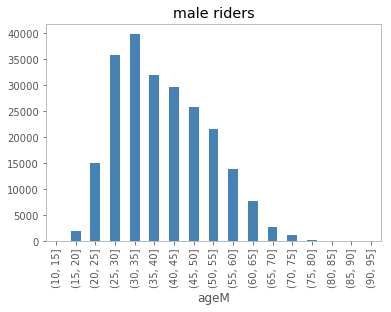

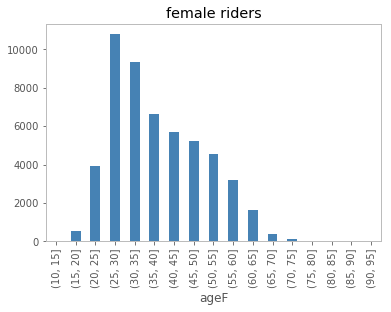

In [58]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders");

**Figure 1: histogrammed distribution of riders' ages by gender **
here is where you should have a nice caption that describes what I am looking at, why I am looking at it, and what I should notice

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.001657
(20, 25]       0.010955
(25, 30]       0.060955
(30, 35]       0.065548
(35, 40]       0.052146
(40, 45]       0.031750
(45, 50]       0.018657
(50, 55]       0.011015
(55, 60]       0.010957
(60, 65]       0.008149
(65, 70]       0.003203
(70, 75]       0.000663
(75, 80]       0.000188
(80, 85]       0.000002
(85, 90]       0.000075
(90, 95]       0.000000


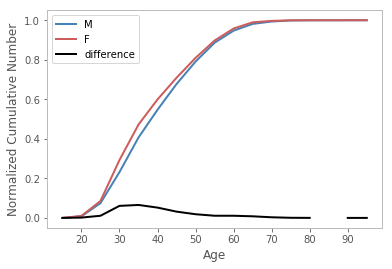

In [59]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' ages by gender** ... [a good caption here]

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [12]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [68]:
ks = scipy.stats.ks_2samp(df.ageM[~np.isnan(df.ageM)], df.ageF[~np.isnan(df.ageF)])
print (ks)

Ks_2sampResult(statistic=0.09128675483027056, pvalue=1.1723000718567192e-307)


**  FILL IN THE CELL BELOW!**

In [72]:
ks.pvalue

1.1723000718567192e-307

## The p value is way smaller than 5% level so we could reject the null hypothesis that there is no statistical difference in the age distribution of male and female riders and conclude that there is some statistical difference.



The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

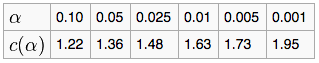

In [16]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="../plotsforclasses/ks2sample_table.png")

In [116]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS
n1 = float(len(df.ageM[~np.isnan(df.ageM)]))
n2 = float(len(df.ageF[~np.isnan(df.ageF)]))
Dcrit = 1.36*np.sqrt((n1+n2)/(n1*n2))
Dmf = max((np.sqrt(csF / csF.max() - csM / csM.max())**2).count_nonzero.values)

In [118]:
if Dmf > Dcrit:
    print('We could reject the null hypothesis that there is no statistical difference in the age distribution of male and female riders and conclude that there is some statistical difference.')
else:
    print('We could not reject the null hypothesis')

We could reject the null hypothesis that there is no statistical difference in the age distribution of male and female riders and conclude that there is some statistical difference.


# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [18]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis



In [142]:
ageM = df.ageM[~np.isnan(df.ageM)]
ageF = df.ageF[~np.isnan(df.ageF)]

In [143]:
ageM1 = np.sort(np.random.choice(ageM,size=min(len(ageM)/200,len(ageF)/200)))
ageF1 = np.sort(np.random.choice(ageF,size=min(len(ageM)/200,len(ageF)/200)))

In [152]:
pearson = scipy.stats.pearsonr(ageM1,ageF1)
print('the Pearson’s correlation coefficient is {}, the 2-tailed p-value is {}'.format(pearson[0],pearson[1]))

the Pearson’s correlation coefficient is 0.991207212746, the 2-tailed p-value is 1.19636862263e-228


## The p value is way smaller than 5% level so we could reject the null hypothesis that there is no statistical difference in the age distribution of male and female riders and conclude that there is some statistical difference.

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [153]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis
spearman = scipy.stats.spearmanr(ageM1,ageF1)
print('the Spearman’s correlation coefficient is {}, the 2-tailed p-value is {}'.format(spearman[0],spearman[1]))


the Spearman’s correlation coefficient is 0.998518591439, the 2-tailed p-value is 0.0


## The p value is way smaller than 5% level so we could reject the null hypothesis that there is no statistical difference in the age distribution of male and female riders and conclude that there is some statistical difference.

** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**

## What is returned is the test's correlation coefficient and the corresponding p-value. What is interesting is that in both of the pearson and spearman test the two distributions are highly correlated while the p-value is mighty small so we reject the Null hypothesis so it means that being correlated does not mean that they have similar distributions. And the pearson correlation coefficient here is pretty high so we could assume that the distribution is more likely to be similar to normal distribution.

# 2. trip duration of bikers that ride during the day vs night. State your result in words in terms of the Null Hypothesis

**H0: there is no statistical difference in the day and night duration distribution of all bikers**
$$ \alpha = 0.05 $$

In [4]:
datestring1 = '201606'
getCitiBikeCSV(datestring1)
datestring2 = '201607'
getCitiBikeCSV(datestring2)

('Downloading', '201606')
file in place, you can continue
('Downloading', '201607')
file in place, you can continue


In [5]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring1 + '-citibike-tripdata.csv')
df1.head()

tripduration          starttime           stoptime  start station id  \
0          1470  6/1/2016 00:00:18  6/1/2016 00:24:48               380   
1           229  6/1/2016 00:00:20  6/1/2016 00:04:09              3092   
2           344  6/1/2016 00:00:21  6/1/2016 00:06:06               449   
3          1120  6/1/2016 00:00:28  6/1/2016 00:19:09               522   
4           229  6/1/2016 00:00:53  6/1/2016 00:04:42               335   

         start station name  start station latitude  start station longitude  \
0          W 4 St & 7 Ave S               40.734011               -74.002939   
1         Berry St & N 8 St               40.719009               -73.958525   
2           W 52 St & 9 Ave               40.764618               -73.987895   
3   E 51 St & Lexington Ave               40.757148               -73.972078   
4  Washington Pl & Broadway               40.729039               -73.994046   

   end station id         end station name  end station latitude  \
0            3236       W 42 St & Dyer Ave             40.758985   
1            3103      N 11 St & Wythe Ave             40.721533   
2             469       Broadway & W 53 St             40.763441   
3             401  Allen St & Rivington St             40.720196   
4             285       Broadway & E 14 St             40.734546   

   end station longitude  bikeid    usertype  birth year  gender  
0             -73.993800   19859  Subscriber      1972.0       1  
1             -73.957824   16233  Subscriber      1967.0       1  
2             -73.982681   22397  Subscriber      1989.0       1  
3             -73.989978   16231  Subscriber      1991.0       1  
4             -73.990741   15400  Subscriber      1989.0       1

In [6]:
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')
df2.head()

tripduration          starttime           stoptime  start station id  \
0           704  7/1/2016 00:00:02  7/1/2016 00:11:47               459   
1           492  7/1/2016 00:00:18  7/1/2016 00:08:31               293   
2           191  7/1/2016 00:00:19  7/1/2016 00:03:31              3090   
3           687  7/1/2016 00:00:24  7/1/2016 00:11:52               459   
4           609  7/1/2016 00:00:31  7/1/2016 00:10:40               284   

      start station name  start station latitude  start station longitude  \
0       W 20 St & 11 Ave               40.746745               -74.007756   
1  Lafayette St & E 8 St               40.730287               -73.990765   
2    N 8 St & Driggs Ave               40.717746               -73.956001   
3       W 20 St & 11 Ave               40.746745               -74.007756   
4  Greenwich Ave & 8 Ave               40.739017               -74.002638   

   end station id             end station name  end station latitude  \
0             347  Greenwich St & W Houston St             40.728846   
1             466              W 25 St & 6 Ave             40.743954   
2            3107     Bedford Ave & Nassau Ave             40.723117   
3             347  Greenwich St & W Houston St             40.728846   
4             212      W 16 St & The High Line             40.743349   

   end station longitude  bikeid    usertype  birth year  gender  
0             -74.008591   17431    Customer         NaN       0  
1             -73.991449   24159  Subscriber      1984.0       1  
2             -73.952123   16345  Subscriber      1986.0       2  
3             -74.008591   25210    Customer         NaN       0  
4             -74.006818   15514    Customer         NaN       0

In [7]:
# concatenate two dataframes into one
df = pd.concat([df1,df2])

In [9]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

tripduration          starttime           stoptime  start station id  \
0          1470  6/1/2016 00:00:18  6/1/2016 00:24:48               380   
1           229  6/1/2016 00:00:20  6/1/2016 00:04:09              3092   
2           344  6/1/2016 00:00:21  6/1/2016 00:06:06               449   
3          1120  6/1/2016 00:00:28  6/1/2016 00:19:09               522   
4           229  6/1/2016 00:00:53  6/1/2016 00:04:42               335   

         start station name  start station latitude  start station longitude  \
0          W 4 St & 7 Ave S               40.734011               -74.002939   
1         Berry St & N 8 St               40.719009               -73.958525   
2           W 52 St & 9 Ave               40.764618               -73.987895   
3   E 51 St & Lexington Ave               40.757148               -73.972078   
4  Washington Pl & Broadway               40.729039               -73.994046   

   end station id         end station name  end station latitude  \
0            3236       W 42 St & Dyer Ave             40.758985   
1            3103      N 11 St & Wythe Ave             40.721533   
2             469       Broadway & W 53 St             40.763441   
3             401  Allen St & Rivington St             40.720196   
4             285       Broadway & E 14 St             40.734546   

   end station longitude  bikeid    usertype  birth year  gender  \
0             -73.993800   19859  Subscriber      1972.0       1   
1             -73.957824   16233  Subscriber      1967.0       1   
2             -73.982681   22397  Subscriber      1989.0       1   
3             -73.989978   16231  Subscriber      1991.0       1   
4             -73.990741   15400  Subscriber      1989.0       1   

                 date  
0 2016-06-01 00:00:18  
1 2016-06-01 00:00:20  
2 2016-06-01 00:00:21  
3 2016-06-01 00:00:28  
4 2016-06-01 00:00:53

In [10]:
df.to_csv(os.getenv("PUIDATA") + "/" + datestring1 + datestring2 + '-citibike-tripdata.csv')

In [22]:
df.index = range(len(df.index))
df.head()

tripduration          starttime           stoptime  start station id  \
0          1470  6/1/2016 00:00:18  6/1/2016 00:24:48               380   
1           229  6/1/2016 00:00:20  6/1/2016 00:04:09              3092   
2           344  6/1/2016 00:00:21  6/1/2016 00:06:06               449   
3          1120  6/1/2016 00:00:28  6/1/2016 00:19:09               522   
4           229  6/1/2016 00:00:53  6/1/2016 00:04:42               335   

         start station name  start station latitude  start station longitude  \
0          W 4 St & 7 Ave S               40.734011               -74.002939   
1         Berry St & N 8 St               40.719009               -73.958525   
2           W 52 St & 9 Ave               40.764618               -73.987895   
3   E 51 St & Lexington Ave               40.757148               -73.972078   
4  Washington Pl & Broadway               40.729039               -73.994046   

   end station id         end station name  end station latitude  \
0            3236       W 42 St & Dyer Ave             40.758985   
1            3103      N 11 St & Wythe Ave             40.721533   
2             469       Broadway & W 53 St             40.763441   
3             401  Allen St & Rivington St             40.720196   
4             285       Broadway & E 14 St             40.734546   

   end station longitude  bikeid    usertype  birth year  gender  \
0             -73.993800   19859  Subscriber      1972.0       1   
1             -73.957824   16233  Subscriber      1967.0       1   
2             -73.982681   22397  Subscriber      1989.0       1   
3             -73.989978   16231  Subscriber      1991.0       1   
4             -73.990741   15400  Subscriber      1989.0       1   

                 date  
0 2016-06-01 00:00:18  
1 2016-06-01 00:00:20  
2 2016-06-01 00:00:21  
3 2016-06-01 00:00:28  
4 2016-06-01 00:00:53

In [19]:
df_2 = df[['tripduration','date']]

In [49]:
df_day = df.tripduration[(df.date.dt.hour < 18) & (df.date.dt.hour >= 6)]
df_night = df.tripduration[(df.date.dt.hour >= 18) | (df.date.dt.hour < 6)]

In [55]:
df_2.describe()

tripduration
count  2.840428e+06
mean   9.948937e+02
std    1.101215e+04
min    6.100000e+01
25%    4.040000e+02
50%    6.740000e+02
75%    1.143000e+03
max    6.707533e+06

In [64]:
df_day.max()

6177145

In [65]:
df_day.groupby(pd.cut(df_day,bins)).agg([count_nonzero])

count_nonzero
tripduration                   
(50, 35047]             1933145
(35047, 70044]              377
(70044, 105041]             199
(105041, 140038]             57
(140038, 175035]             38
(175035, 210032]             31
(210032, 245029]             21
(245029, 280026]             22
(280026, 315023]             13
(315023, 350020]              8
(350020, 385017]              7
(385017, 420014]              7
(420014, 455011]              6
(455011, 490008]              7
(490008, 525005]              8
(525005, 560002]              3
(560002, 594999]              4
(594999, 629996]              8
(629996, 664993]              3
(664993, 699990]              0

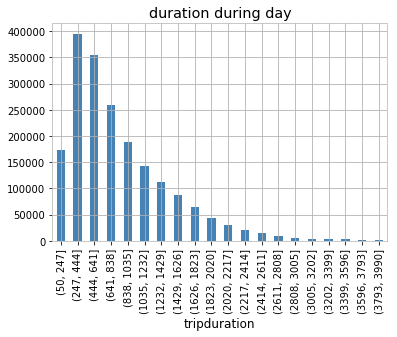

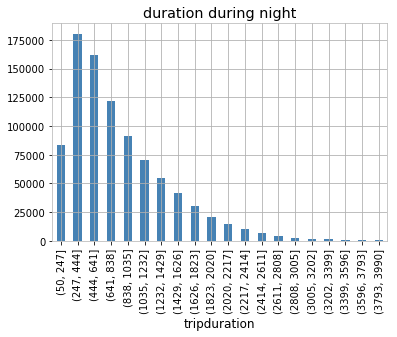

In [68]:
bins = np.arange(50,4000,(4000-50)/20)
axD = df_day.groupby(pd.cut(df_day,bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD.set_title('duration during day')
axN = df_night.groupby(pd.cut(df_night,bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axN.set_title('duration during night')

### Figure 1: histogrammed distribution of duration by day and night

              count_nonzero
tripduration               
(50, 247]          0.002343
(247, 444]         0.003682
(444, 641]         0.008901
(641, 838]         0.008638
(838, 1035]        0.005561
(1035, 1232]       0.002189
(1232, 1429]       0.000684
(1429, 1626]       0.000051
(1626, 1823]       0.000245
(1823, 2020]       0.000496
(2020, 2217]       0.001070
(2217, 2414]       0.001513
(2414, 2611]       0.001743
(2611, 2808]       0.001562
(2808, 3005]       0.001285
(3005, 3202]       0.000939
(3202, 3399]       0.000677
(3399, 3596]       0.000395
(3596, 3793]       0.000152
(3793, 3990]       0.000000


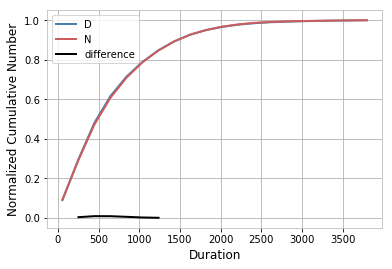

In [70]:
csD=df_day.groupby(pd.cut(df_day,bins)).agg([count_nonzero]).cumsum()

csN=df_night.groupby(pd.cut(df_night,bins)).agg([count_nonzero]).cumsum()

print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "D")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "N")
pl.plot(bins[:-1] + 5, np.sqrt(csD / csD.max() - csN / csN.max())**2, 'k-',
        label = "difference")
pl.xlabel("Duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

## Figure 2: the cumulative distribution of CitiBike bikers' duration by day and night

## Let's do the KS test

In [74]:
ks = scipy.stats.ks_2samp(df_day,df_night)
print(ks)

Ks_2sampResult(statistic=0.007786500951026518, pvalue=6.1584317580786315e-33)


## The p value is way smaller than 5% level so we could reject the null hypothesis and conclude that there is some statistical difference between distributions of duration by day and night

In [88]:
n1 = float(len(df_day))
n2 = float(len(df_night))
Dcrit = 1.36*np.sqrt((n1+n2)/(n1*n2))
Dmf = np.nanmax((np.sqrt(csD / csD.max() - csN / csN.max())**2).count_nonzero.values)

In [89]:
if Dmf > Dcrit:
    print('we could reject the null hypothesis and conclude that there is some statistical difference between distributions of duration by day and night')
else:
    print('We could not reject the null hypothesis')

we could reject the null hypothesis and conclude that there is some statistical difference between distributions of duration by day and night


# Now retest using a test for correlation

# Pearson's test for correlation

In [96]:
dD1 = np.sort(np.random.choice(df_day,size=min(len(df_day)/200,len(df_night)/200)))
dN1 = np.sort(np.random.choice(df_night,size=min(len(df_day)/200,len(df_night)/200)))

In [98]:
pearson = scipy.stats.pearsonr(dD1,dN1)
print('the Pearson’s correlation coefficient is {}, the 2-tailed p-value is {}'.format(pearson[0],pearson[1]))

the Pearson’s correlation coefficient is 0.978371789496, the 2-tailed p-value is 0.0


## The p value is way smaller than 5% level so we could reject the null hypothesis and conclude that there is some statistical difference between distributions of duration by day and night

# Spearman's test for correlation

In [100]:
spearman = scipy.stats.spearmanr(dD1,dN1)
print('the Spearman’s correlation coefficient is {}, the 2-tailed p-value is {}'.format(spearman[0],spearman[1]))

the Spearman’s correlation coefficient is 0.999999030057, the 2-tailed p-value is 0.0


## The p value is way smaller than 5% level so we could reject the null hypothesis and conclude that there is some statistical difference between distributions of duration by day and night and the spearman correlation coefficient is higher than the pearson one so their distribution is less likely to be normal.

# 3. age of bikers for trips originating in Manhattan and in Brooklyn.

**H0: there is no statistical difference in the distribution age of bikers for trips originating in Manhattan and in Brooklyn**
$$ \alpha = 0.05 $$

In [120]:
# Here i'm trying to reverse the long/lat to borough while there is no avilable 
# package on compute so I would extract the csv file of lat/long and process it on my local python
df_location = df[['start station latitude','start station longitude']]
df_location.to_csv(os.getenv("PUIDATA") + "/" + datestring1 + datestring2 + '-citibike-location.csv')

In [125]:
df.head()

tripduration          starttime           stoptime  start station id  \
0          1470  6/1/2016 00:00:18  6/1/2016 00:24:48               380   
1           229  6/1/2016 00:00:20  6/1/2016 00:04:09              3092   
2           344  6/1/2016 00:00:21  6/1/2016 00:06:06               449   
3          1120  6/1/2016 00:00:28  6/1/2016 00:19:09               522   
4           229  6/1/2016 00:00:53  6/1/2016 00:04:42               335   

         start station name  start station latitude  start station longitude  \
0          W 4 St & 7 Ave S               40.734011               -74.002939   
1         Berry St & N 8 St               40.719009               -73.958525   
2           W 52 St & 9 Ave               40.764618               -73.987895   
3   E 51 St & Lexington Ave               40.757148               -73.972078   
4  Washington Pl & Broadway               40.729039               -73.994046   

   end station id         end station name  end station latitude  \
0            3236       W 42 St & Dyer Ave             40.758985   
1            3103      N 11 St & Wythe Ave             40.721533   
2             469       Broadway & W 53 St             40.763441   
3             401  Allen St & Rivington St             40.720196   
4             285       Broadway & E 14 St             40.734546   

   end station longitude  bikeid    usertype  birth year  gender  \
0             -73.993800   19859  Subscriber      1972.0       1   
1             -73.957824   16233  Subscriber      1967.0       1   
2             -73.982681   22397  Subscriber      1989.0       1   
3             -73.989978   16231  Subscriber      1991.0       1   
4             -73.990741   15400  Subscriber      1989.0       1   

                 date  
0 2016-06-01 00:00:18  
1 2016-06-01 00:00:20  
2 2016-06-01 00:00:21  
3 2016-06-01 00:00:28  
4 2016-06-01 00:00:53

In [127]:
df['age'] = 2016 - df['birth year']

In [135]:
df_age = df[['start station longitude','start station latitude','age']]

In [137]:
df_age = df_age.rename(columns={'start station latitude':'lat','start station longitude':'long'})

In [139]:
df_age.to_csv('age.csv')

In [3]:
# Starting from here, I'm using my local Anaconda notebook
df_age = pd.read_csv('age.csv')

In [5]:
from shapely.geometry import shape, mapping, Point
import geojson

In [6]:
file = open('boroughs.geojson')

In [7]:
borodata = geojson.loads(file.read())

In [23]:
borodata

{"crs": {"properties": {"name": "urn:ogc:def:crs:OGC:1.3:CRS84"}, "type": "name"}, "features": [{"geometry": {"coordinates": [[[[-74.05050806403247, 40.566422034160816], [-74.05047137128545, 40.566417387938124], [-74.05030321271762, 40.56641746170315], [-74.05012587375457, 40.5664058803351], [-74.04998352562575, 40.56639592492827], [-74.04931640362088, 40.56588774778044], [-74.04923629842045, 40.5653627363681], [-74.05002620158643, 40.565318180621134], [-74.05074409977215, 40.565887125935035], [-74.05074768943298, 40.565954076753876], [-74.0507322395428, 40.5659921195203], [-74.05073571037053, 40.56603277459578], [-74.05080326895583, 40.566052200461144], [-74.05087333045634, 40.56608124020987], [-74.05090601705089, 40.5660943421306], [-74.05091292519016, 40.56613368475719], [-74.05088200371618, 40.56617829000411], [-74.0508525014346, 40.56618955570327], [-74.05083386287335, 40.56619667357833], [-74.05076507357136, 40.566199326342876], [-74.0507083160659, 40.566194105555866], [-74.05068

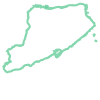

In [36]:
shape(borodata['features'][0]['geometry']).boundary

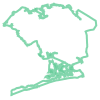

In [37]:
shape(borodata['features'][1]['geometry']).boundary

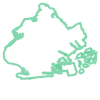

In [38]:
shape(borodata['features'][2]['geometry']).boundary

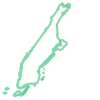

In [39]:
shape(borodata['features'][3]['geometry']).boundary

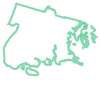

In [35]:
shape(borodata['features'][4]['geometry']).boundary

In [44]:
# From above we could see that
BK = shape(borodata['features'][2]['geometry'])
MH = shape(borodata['features'][3]['geometry'])

In [43]:
p = Point(df_age.long[0],df_age.lat[0])

In [45]:
BK.contains(p)

False

In [ ]:
boro = []
for i in range(len(df_age.index)):
    p = Point(df_age.long[i],df_age.lat[i])
    if BK.contains(p):
        boro.append('BK')
    elif MH.contains(p):
        boro.append('MH')
    else:
        boro.append('Others')

# The function above should work, but it would take about 8 hours to process all of the datasets so to simplify, I used ARCGIS's 'select by location' feature to filter data in BK and MH.

In [4]:
BK_index = pd.read_csv('BK.csv')
MN_index = pd.read_csv('MN.csv')

In [5]:
BK_index = BK_index.FID
MN_index = MN_index.FID

In [6]:
df_BK = df_age.iloc[BK_index,:][['age']]
df_MN = df_age.iloc[MN_index,:][['age']]

In [7]:
df_BK = df_BK.dropna()
df_MN = df_MN.dropna()

In [8]:
# I've now completed filtering
df_BK = df_BK.reset_index(drop=True)
df_MN = df_MN.reset_index(drop=True)

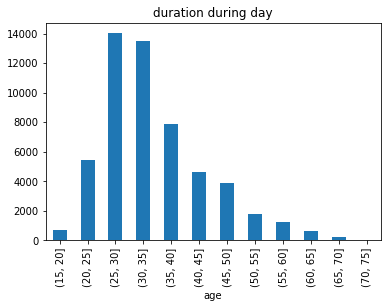

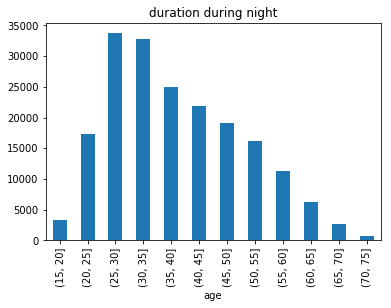

In [9]:
bins = np.arange(15,80,5)
axBK = df_BK.age.groupby(pd.cut(df_BK.age,bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axBK.set_title('duration during day')
axMN = df_MN.age.groupby(pd.cut(df_MN.age,bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axMN.set_title('duration during night')

### Figure 1: histogrammed distribution of age by Manhattan and Brooklyn

          count_nonzero
age                    
(15, 20]       0.004175
(20, 25]       0.005950
(25, 30]       0.088210
(30, 35]       0.165318
(35, 40]       0.179616
(40, 45]       0.150284
(45, 50]       0.121983
(50, 55]       0.069536
(55, 60]       0.033134
(60, 65]       0.012547
(65, 70]       0.002707
(70, 75]       0.000000


C:\Users\sddz0\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


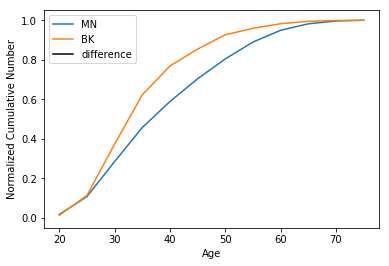

In [10]:
csMN=df_MN.age.groupby(pd.cut(df_MN.age,bins)).agg([count_nonzero]).cumsum()

csBK=df_BK.age.groupby(pd.cut(df_BK.age,bins)).agg([count_nonzero]).cumsum()

print (np.abs(csMN / csMN.max()-csBK / csBK.max()))

pl.plot(bins[:-1] + 5, csMN / csMN.max(), label = "MN")
pl.plot(bins[:-1] + 5, csBK / csBK.max(), label = "BK")
pl.plot(bins[:-1] + 5, np.sqrt(csMN / csMN.max()-csBK / csBK.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

## Figure 2: the cumulative distribution of CitiBike bikers' age by Manhattan and Brooklyn

## Let's do the KS test

In [13]:
ks = scipy.stats.ks_2samp(df_MN.age,df_BK.age)
print(ks)

Ks_2sampResult(statistic=0.18387603869745595, pvalue=0.0)


# The p value is smaller than 5% level so we could reject the null hypothesis and conclude that there is some statistical difference between distributions of age by MN and BK

In [21]:
n1 = float(len(df_MN.age))
n2 = float(len(df_BK.age))
Dcrit = 1.36*np.sqrt((n1+n2)/(n1*n2))
Dmf = np.nanmax((np.sqrt(csMN / csMN.max() - csBK / csBK.max())**2).count_nonzero.values)

C:\Users\sddz0\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


In [19]:
if Dmf > Dcrit:
    print('we could reject the null hypothesis and conclude that there is some statistical difference between distributions of age by BK and MN')
else:
    print('We could not reject the null hypothesis')

We could not reject the null hypothesis


# Now retest using a test for correlation

# Pearson's test for correlation

In [24]:
dMN = np.sort(np.random.choice(df_MN.age,size=min(len(df_MN.age)/200,len(df_BK.age)/200)))
dBK = np.sort(np.random.choice(df_BK.age,size=min(len(df_MN.age)/200,len(df_BK.age)/200)))

In [25]:
pearson = scipy.stats.pearsonr(dMN,dBK)
print('the Pearson’s correlation coefficient is {}, the 2-tailed p-value is {}'.format(pearson[0],pearson[1]))

the Pearson’s correlation coefficient is 0.983103576786, the 2-tailed p-value is 1.15770047726e-199


# The p value is smaller than 5% level so we could reject the null hypothesis and conclude that there is some statistical difference between distributions of age by MN and BK

# Spearman's test for correlation

In [26]:
spearman = scipy.stats.spearmanr(dMN,dBK)
print('the Spearman’s correlation coefficient is {}, the 2-tailed p-value is {}'.format(spearman[0],spearman[1]))

the Spearman’s correlation coefficient is 0.998295083439, the 2-tailed p-value is 0.0


# The p value is smaller than 5% level so we could reject the null hypothesis and conclude that there is some statistical difference between distributions of age by MN and BK and the spearman correlation coefficient is higher than the pearson one so their distribution is less likely to be normal.